Import Libraries:

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Load the Data:

In [7]:
Emp_data = pd.read_csv("/content/Dataset01-Employee_Attrition.csv")
Emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Dataset Size:

In [8]:
Emp_data.shape

(14999, 10)

List of columns:

In [9]:
Emp_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Data types of columns:

In [10]:
Emp_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Data informations:

In [11]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Cheching for duplicate records:

In [12]:
Emp_data[Emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Drop duplicate Records/Rows

In [13]:
Emp_data1=Emp_data.drop_duplicates()
Emp_data1.shape

(11991, 10)

Checking for mising values:

In [14]:
Emp_data1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Data exploration and visualization

In [15]:
Emp_data1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='left'>

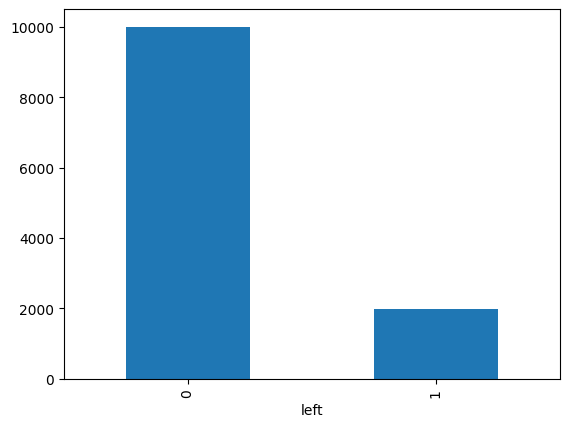

In [16]:
Emp_data1['left'].value_counts().plot(kind='bar')

In [17]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


impact of salary on employee retention

In [18]:
pd.crosstab(Emp_data1.salary,Emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

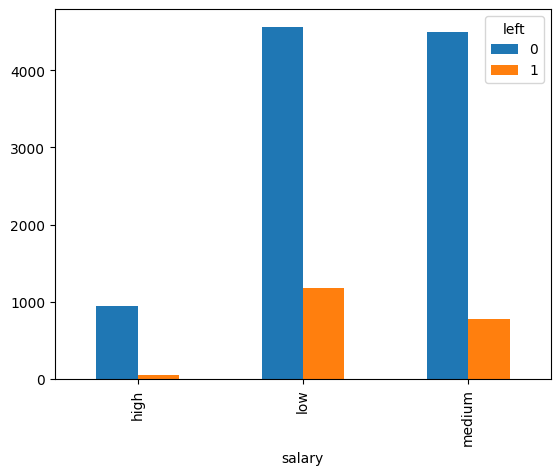

In [19]:
pd.crosstab(Emp_data1.salary,Emp_data1.left).plot(kind='bar')

Above bar shows employee with high salaries are likely to not leave the company

Department wise employee retention:

In [20]:
pd.crosstab(Emp_data1.Department,Emp_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


<Axes: xlabel='Department'>

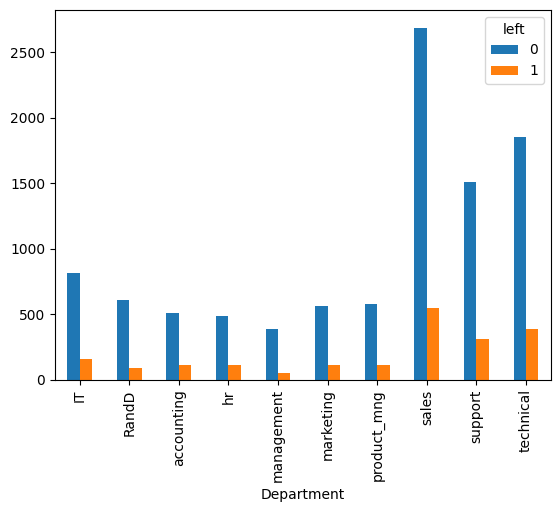

In [21]:
pd.crosstab(Emp_data1.Department,Emp_data1.left).plot(kind='bar')

Distribution of each numerical features:

In [22]:
num_feature_list1 = [f for f in Emp_data1.columns if Emp_data1.dtypes[f]=='float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [23]:
num_feature_list2 = [f for f in Emp_data1.columns if Emp_data1.dtypes[f]== 'int64']
num_feature_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [24]:
num_col_list = ['number_project',
                'average_monthly_hours',
                'time_spend_company',
                'Work_accident',
                'promotion_last_5years','satisfaction_level','last_evaluation']

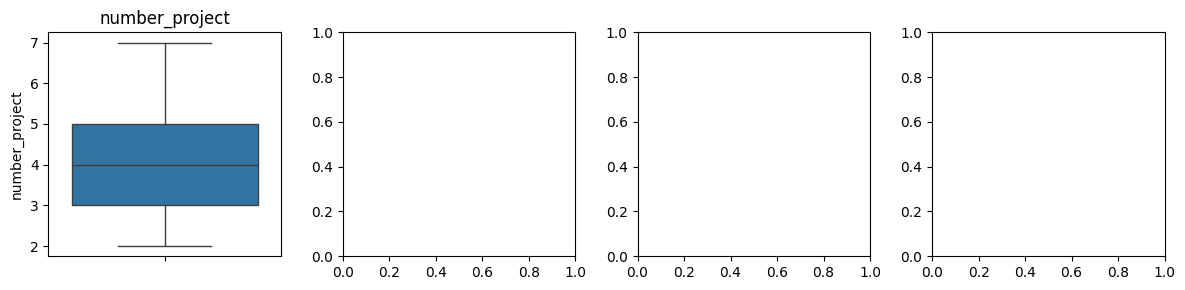

KeyError: 'average_monthly_hours'

In [25]:
fig, axes = plt.subplots(ncols = 4, figsize = (12,3))
for column, axis in zip(num_col_list[:4], axes):
  sns.boxplot(data=Emp_data1[column], ax = axis)
  axis.set_title(column)
  plt.tight_layout()
  plt.show()

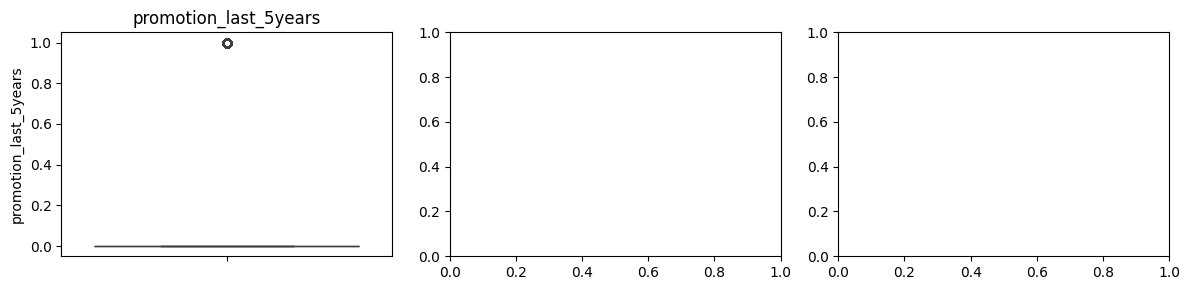

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [26]:
fig, axes = plt.subplots(ncols = 3, figsize = (12,3))
for column, axis in zip(num_col_list[4:], axes):
  sns.boxplot(data=Emp_data1[column], ax=axis)
  axis.set_title(column)
  plt.tight_layout()
  plt.show()

<Axes: ylabel='Frequency'>

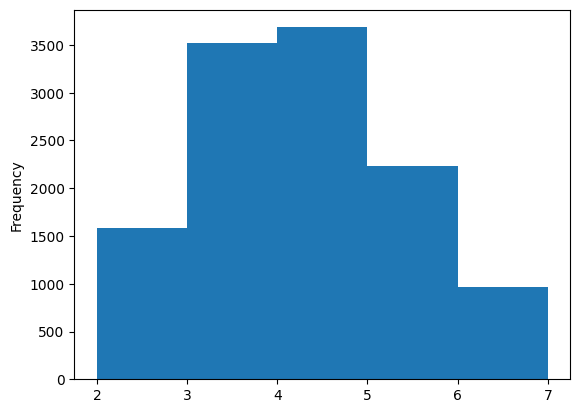

In [27]:
Emp_data1['number_project'].plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

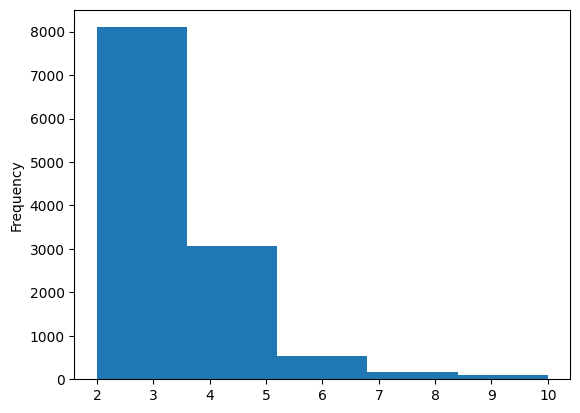

In [29]:
Emp_data1['time_spend_company'].plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

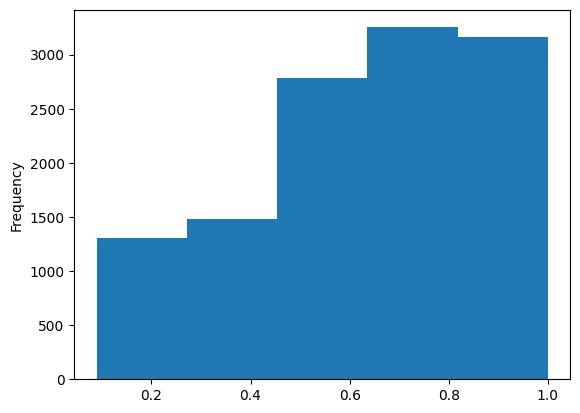

In [30]:
Emp_data1['satisfaction_level'].plot(kind = 'hist', bins = 5)

<Axes: ylabel='Frequency'>

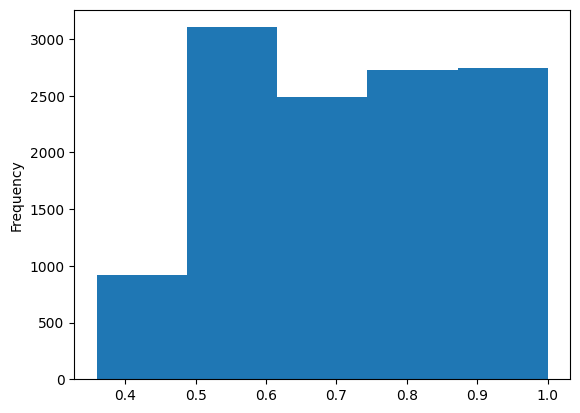

In [31]:
Emp_data1['last_evaluation'].plot(kind = 'hist', bins = 5)

Feature Engineering:

Label Encoding: converting Categorical Features into Numerical

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [33]:
Emp_data1['salary'] = label_encoder.fit_transform(Emp_data1['salary'])
Emp_data1['Department'] = label_encoder.fit_transform(Emp_data1['Department'])

<ipython-input-33-76d442e3bb6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emp_data1['salary'] = label_encoder.fit_transform(Emp_data1['salary'])
<ipython-input-33-76d442e3bb6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emp_data1['Department'] = label_encoder.fit_transform(Emp_data1['Department'])


In [34]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Dependent(Target) and Independent Variable:

In [35]:
x = Emp_data1.drop('left',axis =1)
y = Emp_data1['left']

Splitting data into Training and Testing:

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
x_train.shape

(9592, 9)

In [41]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6426,0.86,0.56,5,141,2,0,0,7,2
288,0.82,0.91,5,232,5,0,0,9,1
5051,0.62,0.52,3,148,3,0,0,7,2
11132,0.43,0.74,4,129,6,0,0,3,2
3687,0.85,0.79,3,156,3,0,0,7,2


Feature Scaling:

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [38]:
xtrain_scaled = std_scaler.fit_transform(x_train)
xtest_scaled = std_scaler.transform(x_test)

In [39]:
xtrain_scaled
xtest_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]])

Model Development:

Random Forest:

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
Random_forest_model = RandomForestClassifier()

Model Training:

In [44]:
Random_forest_model.fit(xtrain_scaled, y_train)

RandomForestClassifier()

Model Prediction:

In [45]:
y_pred = Random_forest_model.predict(xtest_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Model Evaluation:

Confusion Matrix:

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1991    7]
 [  40  361]]


<Axes: >

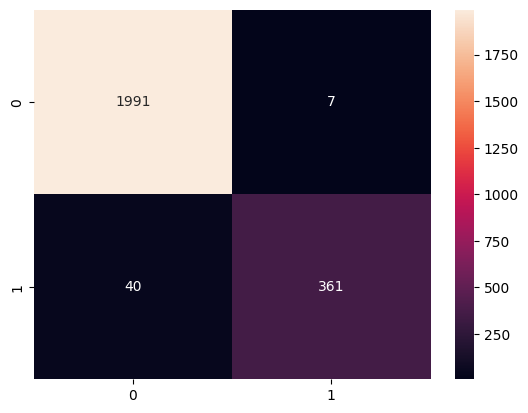

In [47]:
sns.heatmap(cm, annot = True, fmt = 'd')

Accuracy:

In [48]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model = ", model_accuracy)

Accuracy of the model =  0.980408503543143


Precision:

In [49]:
from sklearn.metrics import precision_score
model_precision = precision_score(y_test, y_pred)
print("Precision score of the model = ", model_precision)

Precision score of the model =  0.9809782608695652


Recall:

In [50]:
from sklearn.metrics import recall_score
model_recall = recall_score(y_test, y_pred)
print("Recall score of the model = ", model_recall)

Recall score of the model =  0.9002493765586035


f1-Score:

In [51]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test,y_pred)
print("F1-score of the model = ", f1score)

F1-score of the model =  0.9388816644993497


Classification Report:

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



Feature importance Metrix in Random Forest/ Feature Extraction:

In [54]:
score_list = Random_forest_model.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({"Feature": list_of_features, 'score':score_list})
score_df.sort_values(by = 'score', ascending = False)

,Feature,score
0,satisfaction_level,0.354133
2,number_project,0.173303
4,time_spend_company,0.162308
3,average_montly_hours,0.160628
1,last_evaluation,0.124498
7,Department,0.011764
8,salary,0.007673
5,Work_accident,0.004842
6,promotion_last_5years,0.000852


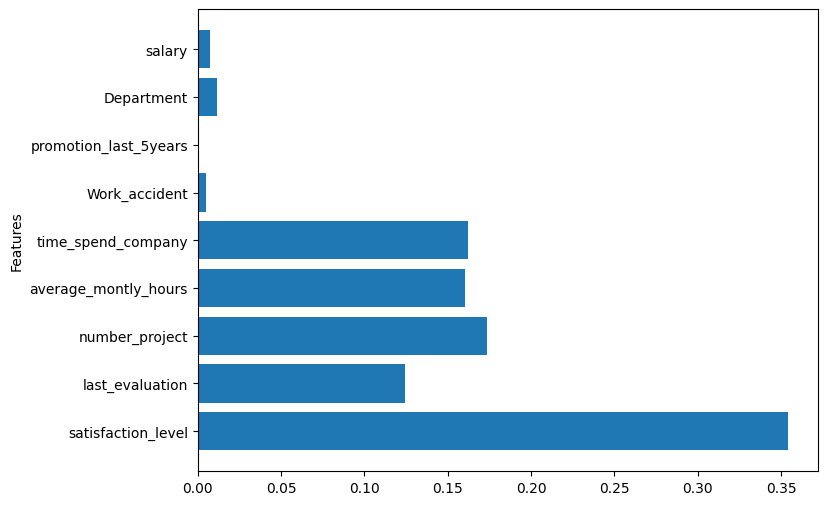

In [56]:
list_of_features = list(x.columns)
plt.figure(figsize = (8,6))
plt.barh(range(len(list_of_features)), Random_forest_model.feature_importances_)
plt.yticks(np.arange(len(list_of_features)), list_of_features)
plt.ylabel('Features')
plt.show()

k-fold Cross Validation:

In [58]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model, xtrain_scaled, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores = ', scores)

Cross-validation scores =  [0.9890568  0.98228244 0.98488008 0.98540146 0.98696559]


In [59]:
Avg_Model_score = scores.mean()
print('Average Model Score = ', Avg_Model_score)

Average Model Score =  0.9857172743233382


Hyper Parameter Tuning:

Grid Search CV | random Search CV

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

List of Parameters:

In [61]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt', 'log2', None]
}

Search the Best parameters:

In [62]:
grid_search = GridSearchCV(estimator = Random_forest_model,
                           param_grid = parameters)

In [63]:
grid_search.fit(xtrain_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

Best parameters:

In [64]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

Building New model with best parameters:

In [67]:
Random_forest_model_new = RandomForestClassifier(max_features = 'log2', n_estimators = 100)

In [68]:
Random_forest_model_new.fit(xtrain_scaled,y_train)

RandomForestClassifier(max_features='log2')